In [17]:
import numpy as np
import quantities as pq
import matplotlib.pyplot as plt
from neo.io import AxonIO
import csv
import os
print(os.getcwd())
print(os.access('WT step input cells/Cell 1 of 6617.abf', os.R_OK))
print(os.listdir('WT step input cells'))
%matplotlib notebook

/mnt/i/Thesis work/Deepanjali data
True
['Attributes.xlsx', 'Cell 1 of 12617.abf', 'Cell 1 of 12717.abf', 'Cell 1 of 13218.abf', 'Cell 1 of 15118.abf', 'Cell 1 of 201217.abf', 'Cell 1 of 22317.abf', 'Cell 1 of 23317.abf', 'Cell 1 of 24517.abf', 'Cell 1 of 25517.abf', 'Cell 1 of 6617.abf', 'Cell 2 of 12717.abf', 'Cell 2 of 13218.abf', 'Cell 2 of 171117.abf', 'Cell 2 of 201217.abf', 'Cell 2 of 25118.abf', 'Cell 3 of 10717.abf', 'Cell 3 of 13218.abf', 'Cell 3 of 181016.abf', 'Cell 3 of 6617.abf', 'cell 4 of 111016.abf', 'cell 4 of 131016.abf', 'Cell 4 of 181016.abf', 'Cell 4 of 201117.abf', 'cell 4 of 61016.abf', 'Cell 5 of 181016.abf', 'cell 5 of 61016.abf', 'Cell 6 of 171117.abf']


In [2]:
filename = 'WT step input cells/Cell 3 of 10717.abf'
reader = AxonIO(filename=filename)
AxonIO.readable_objects

[neo.core.block.Block, neo.core.segment.Segment]

In [19]:
seg = reader.read_block().segments[5]
seg

Segment with 1 analogsignals, 1 events
annotations: {'abf_version': 2.6}
# analogsignals (N=1)
0: AnalogSignal with 1 channels of length 40000; units mV; datatype float32 
   name: 'AI#0'
   annotations: {'channel_id': 0, 'nADCNum': 0}
   sampling rate: 20000.0
   time: 10.0 to 12.0

[[-72.96753]
 [-72.99805]
 [-72.96753]
 [-72.99805]
 [-72.96753]]


<IPython.core.display.Javascript object>


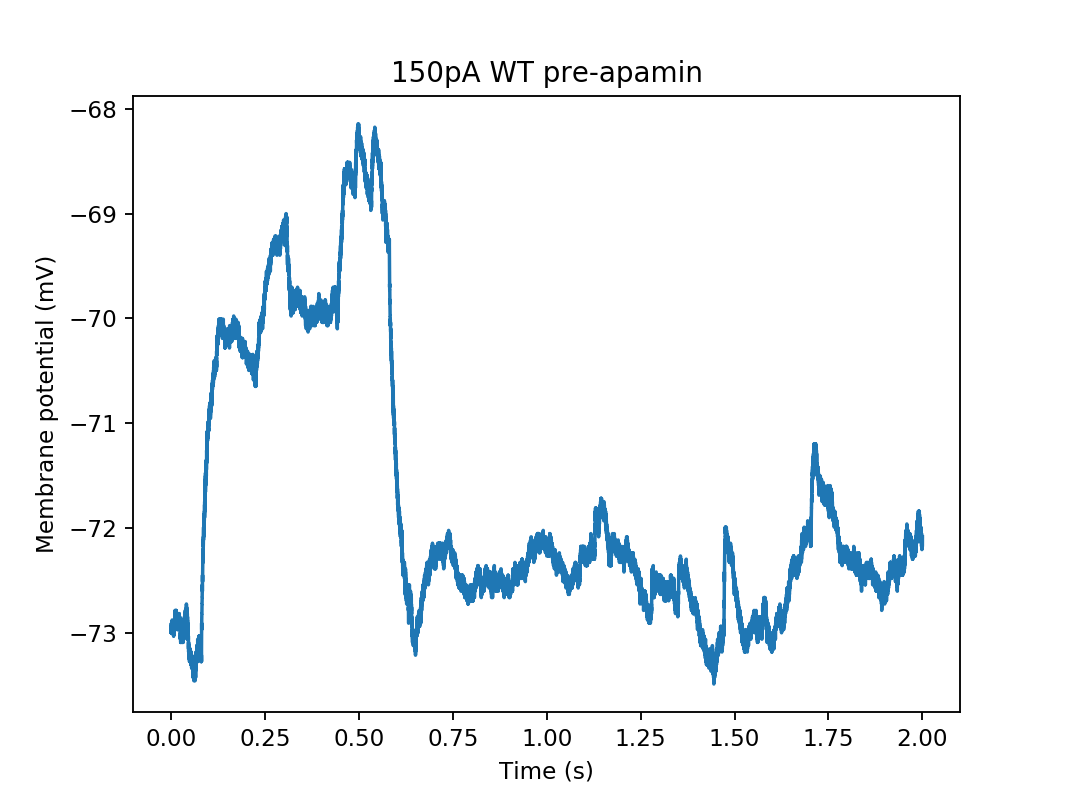

In [20]:
print(np.array(seg.analogsignals[0])[:5])
plt.plot(np.linspace(0,2,40000),seg.analogsignals[0])
plt.title('150pA WT pre-apamin')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (mV)')
plt.show()

In [38]:
file.close()
with open('D225118_25pA_WT_preAp.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(np.array(seg.analogsignals[0]))

## Calculate number of spikes

17


<IPython.core.display.Javascript object>


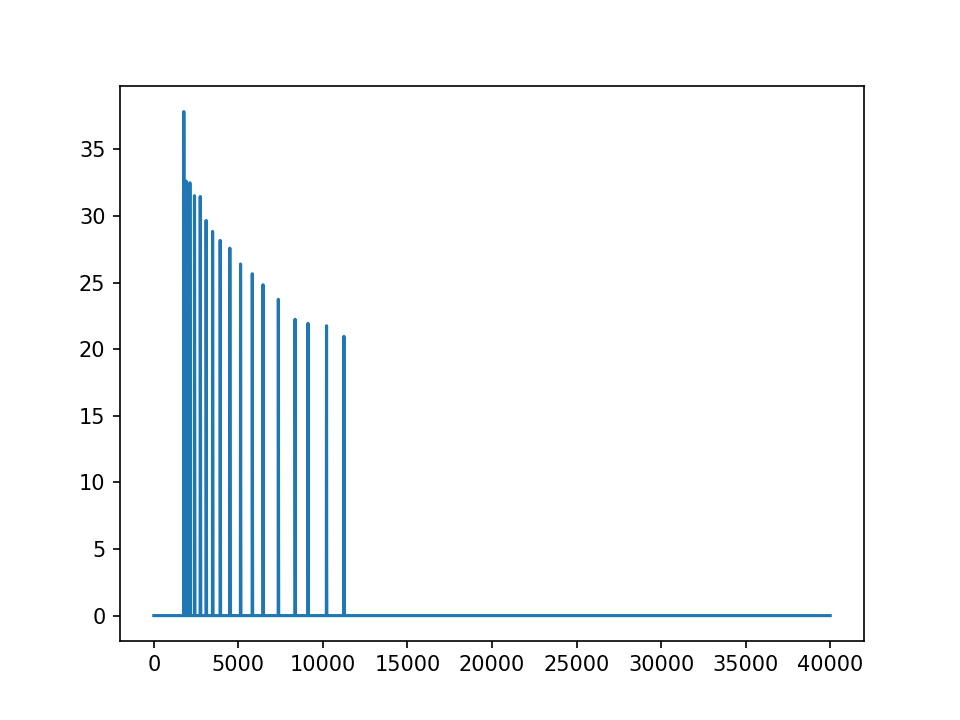

In [75]:
V_trace = np.array(seg.analogsignals[0])
V_trace[V_trace<=0]=0
start = False
sp_start = []
sp_end = []
for i in range(0,len(V_trace)):
    if V_trace[i]>0 and start == False:
        start = True
        sp_start.append(V_trace[i])
    if V_trace[i]==0 and start == True:
        start = False
        sp_end.append(V_trace[i])
sp_peak = np.add(sp_start,sp_end)/2
print(len(sp_peak))
plt.plot(V_trace)
plt.show()

## average plot for -25pA current

<IPython.core.display.Javascript object>


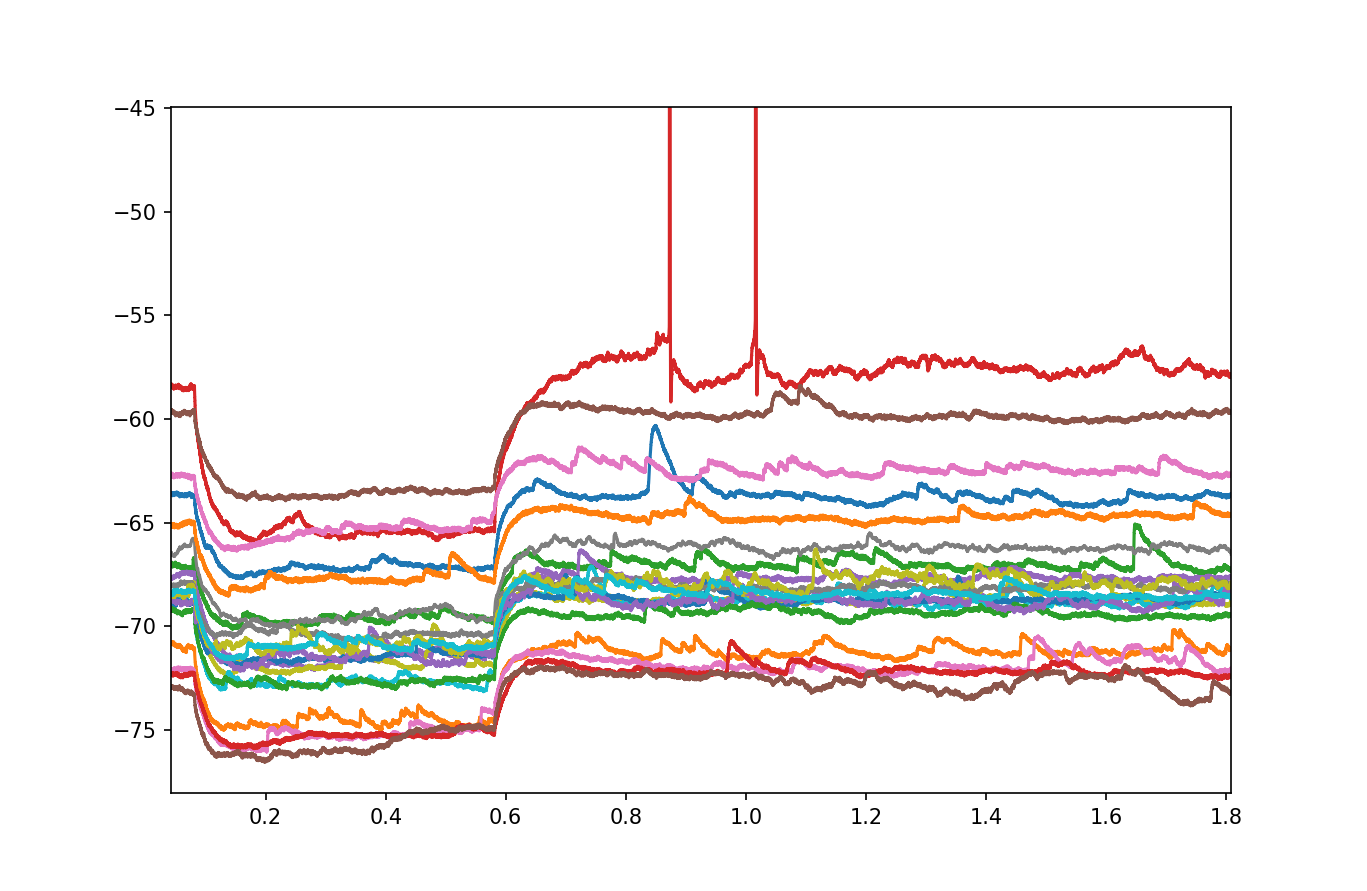

In [9]:
avgVtrace = np.zeros(40000)
i = 0
for filename in os.listdir('WT step input cells'):
    i = i+1
    print(i, end = '\r')
    reader = AxonIO(filename='WT step input cells/'+filename)
    seg = reader.read_block().segments[3]
    try:
        plt.plot(np.linspace(0,2,40000),seg.analogsignals[0])
    except:
        pass
    #avgVtrace = np.add(avgVtrace,seg.analogsignals[0])
#avgVtrace = avgVtrace/i
#plt.plot(np.linspace(0,2,40000),avgVtrace)
plt.show()

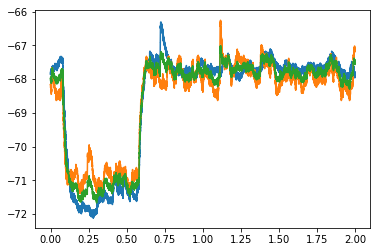

In [4]:
filename1 = 'WT step input cells/Cell 1 of 201217.abf'
filename2 = 'WT step input cells/Cell 4 of 201117.abf'
reader1 = AxonIO(filename=filename1)
reader2 = AxonIO(filename=filename2)
seg1 = reader1.read_block().segments[3]
seg2 = reader2.read_block().segments[3]
Vtrace = (seg1.analogsignals[0] + seg2.analogsignals[0])/2
plt.plot(np.linspace(0,2,40000),seg1.analogsignals[0])
plt.plot(np.linspace(0,2,40000),seg2.analogsignals[0])
plt.plot(np.linspace(0,2,40000),Vtrace)
plt.show()